In [44]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [2]:
# Please fill in your names here
NAME_STUDENT_1 = "Koen Klaren"
NAME_STUDENT_2 = "Leroy Visser"

In [45]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
# InteractiveShell.ast_node_interactivity = "all"

## MoneyBall (5 points, 1+2+1+1)
In the early 2000s, 2 baseball scouts completely changed the game of baseball by analysing the available data about baseball players and hiring the best ones.
The [MoneyBall dataset](https://www.openml.org/d/41021) contains this data (click the link for more details). The goal is to accurately predict the number of 'runs' each player can score. 

In [46]:
moneyball = oml.datasets.get_dataset(41021) # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
ballframe = pd.DataFrame(X, columns=attribute_names)
ballframe.describe()

,Team,League,Year,RA,...,RankPlayoffs,G,OOBP,OSLG
count,1232.00,1232.0,1232.00,1232.00,...,244.00,1232.00,420.00,420.00
mean,15.67,0.5,1988.96,715.08,...,1.72,3.92,0.33,0.42
std,9.72,0.5,14.82,93.08,...,1.10,0.62,0.02,0.03
min,0.00,0.0,1962.00,472.00,...,0.00,0.00,0.29,0.35
25%,7.00,0.0,1976.75,649.75,...,1.00,4.00,0.32,0.40
50%,16.00,0.5,1989.00,709.00,...,2.00,4.00,0.33,0.42
75%,23.00,1.0,2002.00,774.25,...,3.00,4.00,0.34,0.44
max,38.00,1.0,2012.00,1103.00,...,4.00,7.00,0.38,0.50


1 . Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment?
- Feel free to create additional plots that help you understand the data
- Only visualize the data, you don't need to change it (yet)

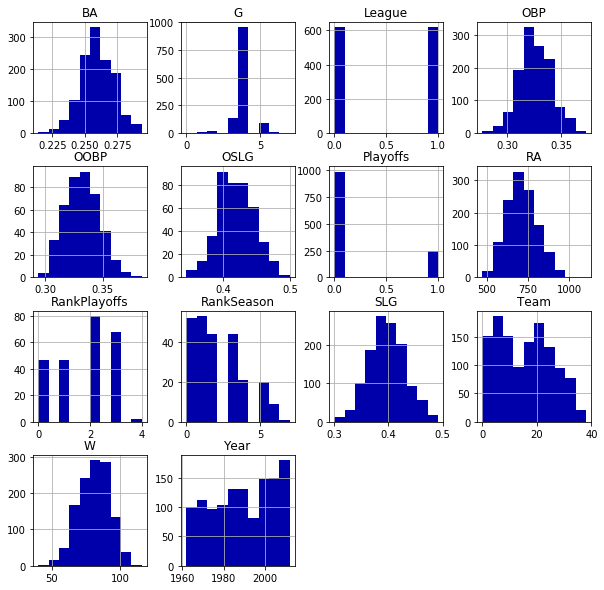

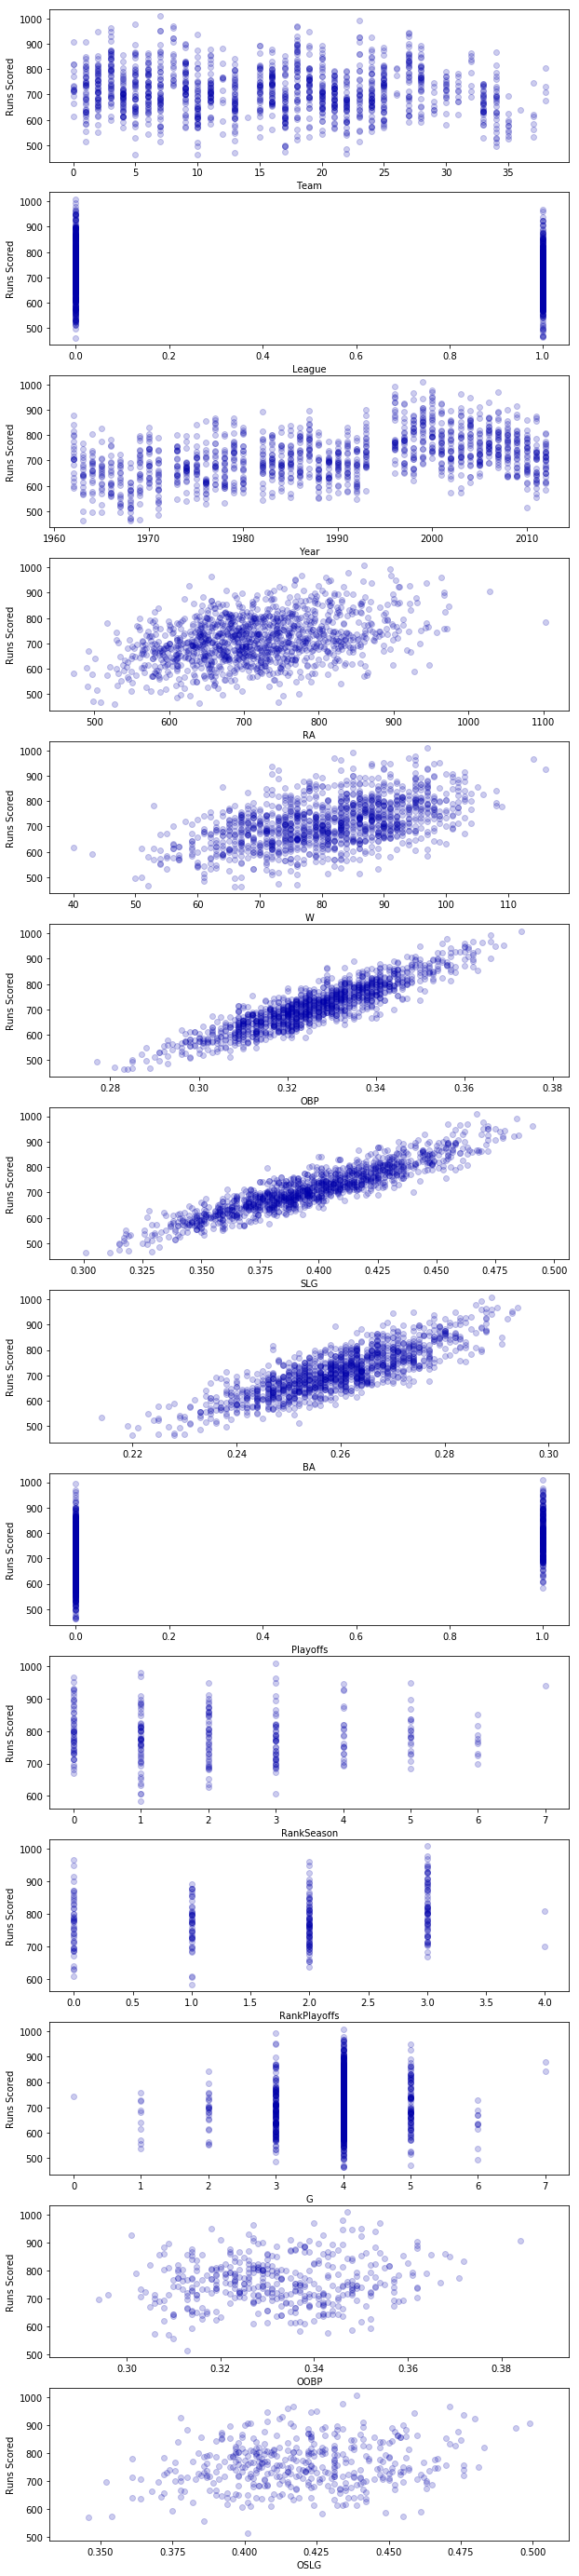

In [41]:
# Creates histogram for each feature
ballframe.hist(figsize= (10,10))

# Creates scatter plot for each feature and corresponing RS value
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(attribute_names), figsize=(10,50))

for i, ax in enumerate(axes):
    ax.scatter(x=ballframe[attribute_names[i]], y=y, alpha=0.2)
    ax.set_xlabel(attribute_names[i])
    ax.set_ylabel("Runs Scored")

**Is there anything that stands out?**

One can immediately see in the histograms that the following features BA, OBP, OOBP, OSLG, RA, SLG, W have a curve that looks like a normal distribution. Futhermore league and playoff have a boolean value. For games played one can see in the histogram a single bar implying that most teams share the same number of games played. Thus this feature might not be relevant for our models. Lastly some data points are missing. 

**Is there something that you think might require special treatment?**

Categorical features which are not ordinal need special treatment like team, league, playoffs, rank season, rank playoffs and games played. Also, the values that are missing need to be handled, as not to disrupt the estimators.

2 . Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. Evaluate using cross-validation and the $R^2$ score, with the default parameters. Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.
- Preprocess the data as needed (e.g. are there nominal features that are not ordinal?). If you don't know how to proceed, remove the feature and continue.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline

# Impute the data
imputer = Imputer(missing_values='NaN', strategy='mean', copy=False)
X_imputed = imputer.fit_transform(X)

# Encode categorical values
ballframe_imputed = pd.DataFrame(X_imputed, columns=attribute_names)

ballframe_imputed['Team'] = ballframe_imputed['Team'].astype(str)
ballframe_imputed['League'] = ballframe_imputed['League'].astype(str)
ballframe_imputed['Playoffs'] = ballframe_imputed['Playoffs'].astype(str)
ballframe_imputed['RankSeason'] = ballframe_imputed['RankSeason'].astype(str)
ballframe_imputed['RankPlayoffs'] = ballframe_imputed['RankPlayoffs'].astype(str)
ballframe_imputed['G'] = ballframe_imputed['G'].astype(str)

features = pd.get_dummies(ballframe_imputed)
X_encoded = features.values
attribute_names_encoded = features.columns.values

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

estimators = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    KNeighborsRegressor()
]

for estimator in estimators:
    print(estimator.__class__.__name__)
    
    scores = cross_val_score(estimator, X_encoded, y)
    print("Cross-validation scores: {}".format(scores))
    print("Cross-validation average score: {:.3f}".format(scores.mean()))
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('estimator', estimator)
    ])
    scaled_scores = cross_val_score(pipeline, X_encoded, y)
    print("Scaled: Cross-validation scores: {}".format(scaled_scores))
    print("Scaled: Cross-validation average score: {:.3f}".format(scaled_scores.mean()))
    
    print("Gain: {:.1f}%".format(100 / scores.mean() * scaled_scores.mean() - 100))
    

    print()

LinearRegression
Cross-validation scores: [0.909 0.923 0.927]
Cross-validation average score: 0.920
Scaled: Cross-validation scores: [  -2775.99   -30136.184 -850935.222]
Scaled: Cross-validation average score: -294615.799
Gain: -32034824.2%

Ridge
Cross-validation scores: [0.808 0.87  0.846]
Cross-validation average score: 0.841
Scaled: Cross-validation scores: [0.908 0.923 0.928]
Scaled: Cross-validation average score: 0.920
Gain: 9.3%

Lasso
Cross-validation scores: [0.803 0.848 0.829]
Cross-validation average score: 0.827
Scaled: Cross-validation scores: [0.916 0.923 0.937]
Scaled: Cross-validation average score: 0.925
Gain: 11.9%

ElasticNet
Cross-validation scores: [0.803 0.849 0.829]
Cross-validation average score: 0.827
Scaled: Cross-validation scores: [0.869 0.874 0.876]
Scaled: Cross-validation average score: 0.873
Gain: 5.6%

KNeighborsRegressor
Cross-validation scores: [0.54  0.698 0.514]
Cross-validation average score: 0.584
Scaled: Cross-validation scores: [0.321 0.564 0.

**Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.**

First of all, for LinearRegression applying the StandardScaler gives impossible results. We have tried many ways to scale the data, but nothing worked. So scaling does not seem to work for LinearRegression.

For the other linear models scaling with the StandardScaler improves the performance of the algorithms. The largest rise in score is gained by the Lasso algorithm, the smallest by ElasticNet.  After scaling, Lasso has the best and KNeighborsRegressor has the worst performance with the default parameters on this dataset.

3 . Do a default, shuffled train-test split and optimize the linear models for the degree of regularization ($alpha$) and choice of penalty (L1/L2). For Ridge and  Lasso, plot a curve showing the effect of the training and test set performance ($R^2$) while increasing the degree of regularization for different penalties. For ElasticNet, plot a heatmap $alpha \times l1\_ratio \rightarrow R^2$ using test set performance.
Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? Can you get better results?
- Think about how you get the L1/L2 loss. This is not a hyperparameter in regression.
- We've seen how to generate such heatmaps in Lecture 3.

In [50]:
# Default, shuffled train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=0, shuffle=True)

In [51]:
from sklearn.linear_model import Ridge

ridge_score = []
ridge_alpha = []
for a in np.logspace(-3, 2, 100):
    ridge = Ridge(alpha = a) # L2 regularisation with Ridge
    scores = ridge.fit(X_train, y_train).score(X_test,y_test)
    ridge_score.append(scores)
    ridge_alpha.append(a)

In [54]:
from sklearn.linear_model import Lasso

lasso_score = []
lasso_alpha = []
for a in np.logspace(-3, 2, 100):
    lasso = Lasso(alpha = a) # L1 regularisation with Lasso
    scores = lasso.fit(X_train, y_train).score(X_test, y_test)
    lasso_score.append(scores)
    lasso_alpha.append(a)

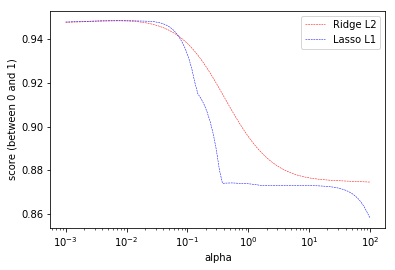

In [56]:
# Make a plot for Ridge and Lasso with alpha and R^2 score
fig, ax = plt.subplots()
ax.set_xscale('log')
plt.plot(ridge_alpha,ridge_score, 'r--', label = "Ridge L2")
plt.plot(lasso_alpha,lasso_score, 'b--', label = "Lasso L1")
plt.xlabel('alpha')
plt.ylabel('score (between 0 and 1)')
plt.legend()

plt.show()

In [57]:
from sklearn.linear_model import ElasticNet

elast_score = []
elast_a = np.logspace(-3, 2, 6)
elast_l = np.linspace(0, 1, 11).round(1)
for a in elast_a:
    for l in elast_l:
        elast = ElasticNet(alpha= a, l1_ratio= l)
        scores = elast.fit(X_train, y_train).score(X_test, y_test)
        elast_score.append(scores)

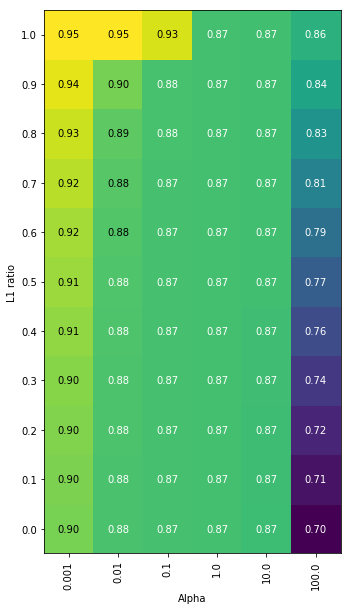

In [60]:
scores = np.array(elast_score).reshape(len(elast_a),len(elast_l)).transpose()
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
mglearn.tools.heatmap(scores, xlabel='Alpha', xticklabels=elast_a, 
                      ylabel='L1 ratio', yticklabels=elast_l, cmap="viridis");

**Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? 
Can you get better results?**

From the heatmap above one can see the increase in alpha leading to a decrease in the score. Simular for the L1 ratio, an 
increase in L1 ratio lead to an inscrease in the score. For alpha = 0.001 and L1 ratio = 1 we get the maximum score (from the heatmap values) of 0.95. We might be able to obtain a better value by decreasing alpha some more. Setting L1 ratio to 1 implies we use L1 penalty only (similar to Lasso). Here we obtain high score on the test data, so overfitting is not likely here.

Regularisation is a way to reduce the chance of your model overfitting the data by putting restrictions on the weight coefficients. 

4 . Visualize the coefficients of the optimized models. Do they agree on which features are
important? Compare the results with the feature importances returned by a RandomForest. Does it agree with the linear models? What would look for when scouting for a baseball player?

In [71]:
# Default, shuffled train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=0, shuffle=True)

In [73]:
alpha = lasso_alpha[lasso_score.index(max(lasso_score))]
lasso = Lasso(alpha=alpha) # L1 regularisation with Lasso
scores = lasso.fit(X_train, y_train).score(X_test, y_test)

In [74]:
alpha = ridge_alpha[ridge_score.index(max(ridge_score))]
ridge = Ridge(alpha=alpha) # L2 regularisation with Ridge
scores = ridge.fit(X_train, y_train).score(X_test, y_test)

In [75]:
elast = ElasticNet(alpha=0.001, l1_ratio=1)
scores = elast.fit(X_train, y_train).score(X_test, y_test)

In [76]:
from sklearn.ensemble import RandomForestClassifier
# Use random forest classifier.
forest = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)

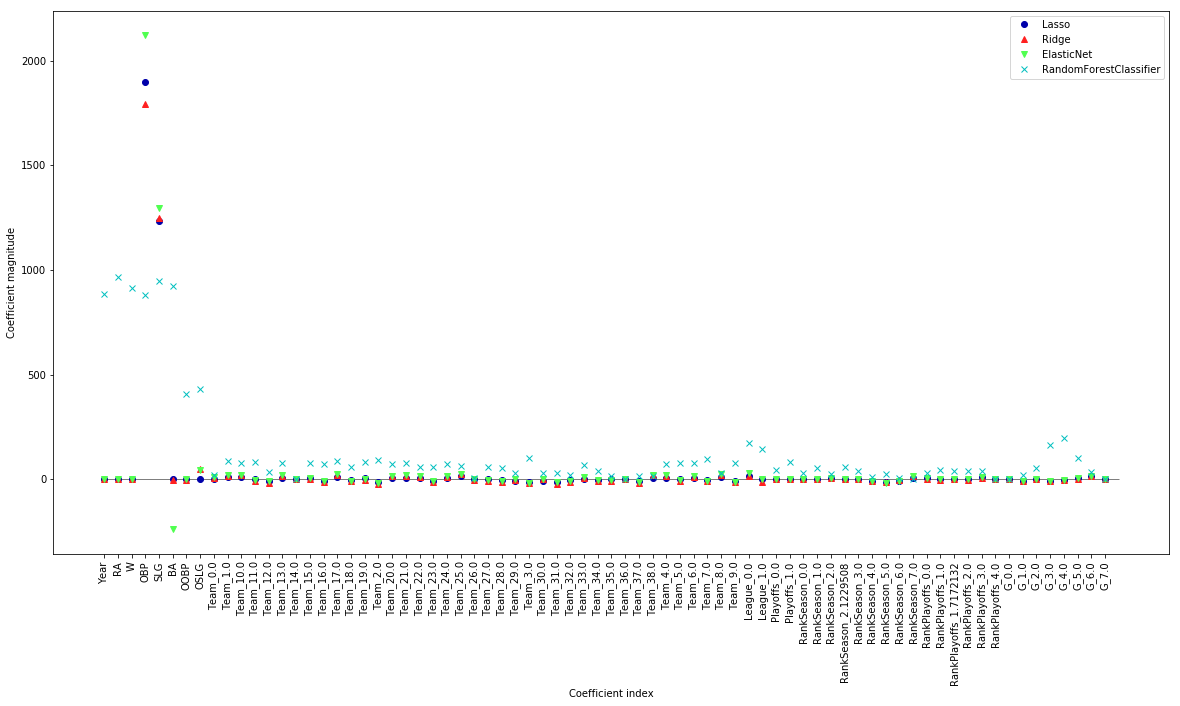

In [93]:
fig, ax = plt.subplots(figsize=(20, 10))
# ax.set_yscale('log')
plt.plot(lasso.coef_.T, 'o', label='Lasso')
plt.plot(ridge.coef_.T, '^', label='Ridge')
plt.plot(elast.coef_.T, 'v', label='ElasticNet')
plt.plot(10000 * forest.feature_importances_, 'x', label='RandomForestClassifier')
plt.xticks(range(X_encoded.shape[1]), attribute_names_encoded, rotation=90)
plt.hlines(0, 0, X_encoded.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()

**Does it agree with the linear models? What would look for when scouting for a baseball player?**

In the figure above the RadomFOrestClassifier is represented with a blue x. To make the imported features more visually clear, the results were scaled by a factor 10000. One can clearly see the RadomForestClassifier find the first few features the most important, thus year, RA, W, SLG, BA. The OOBP, OSLG, league_0.0, G_3.0 and G_4.0 are also importent, but still less than the other features we have seen thusfar. SLG and OBP are by far the most important features according to Lasso, Ridge and ElasticNet. The linear models do therefore agree on these features, but not on the other ones. One point of interrest is the BA feature

## Nepalese character recognition (5 points, 1+2+2)
The [Devnagari-Script dataset](https://www.openml.org/d/40923) contains 92,000 images (32x32 pixels) of 46 characters from Devanagari script. Your goal is to learn to recognize the right letter given the image.

In [0]:
devnagari = oml.datasets.get_dataset(40923) # Download Devnagari data
# Get the predictors X and the labels y
X, y = devnagari.get_data(target=devnagari.default_target_attribute); 
# classes = devnagari.retrieve_class_labels(target_name='character') # This one takes a while, skip if not needed

NameError: name 'classes' is not defined

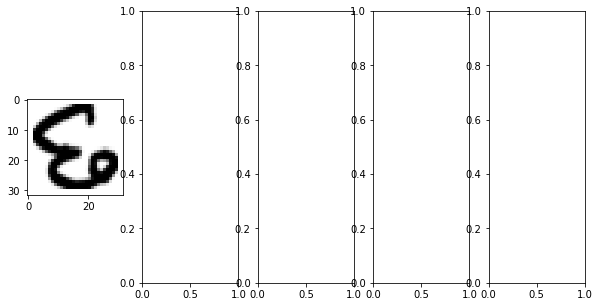

In [0]:
from random import randint
# Take some random examples, reshape to a 32x32 image and plot
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,90000)
    axes[i].imshow(X[n].reshape(32, 32), cmap=plt.cm.gray_r)
    axes[i].set_xlabel("Class: %s" % (classes[y[n]]))
plt.show();

1. Evaluate k-Nearest Neighbors, Logistic Regression and RandomForests with their default settings.
    - Take a stratified 10% subsample of the data.
    - Use the default train-test split and predictive accuracy. Is predictive accuracy a good scoring measure for this problem?
    - Try to build the same models on increasingly large samples of the dataset (e.g. 10%, 20%,...). Plot the training time and the predictive performance for each. Stop when the training time becomes prohibitively large (this will be different for different models). 

In [0]:
# Take a startified 10% subsample of the data 
from sklearn.model_selection import train_test_split
X_strat, X_test_strat, y_strat, y_test_strat = train_test_split(X, y, train_size=0.1, stratify = y)

In [0]:
# Use default train-test split and predictive accurecy
X_train, X_test, y_train, y_test = train_test_split(X_strat, y_strat)

In [19]:
# k-NN on training set
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_jobs=-1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(nbrs.score(X_train, y_train)))
print("Test set score: {:.2f}".format(nbrs.score(X_test, y_test)))

Training set score: 0.86
Test set score: 0.75


In [0]:
# Logistic Regression on training set
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lreg.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.46


In [0]:
# Random forest on training set
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.56


**Is predictive accuracy a good scoring measure for this problem?**

Predictive accuracy is not a good scoring measure for the problem. Only 10% of the data is used. However the data is collected in
a stratified way meaning samples are taken from every subgroup in the data. Thus the 10% data has data from all different groups
and is therefore a good overview of the total data. Still only 10% of the total data is taken, thus the other 90% is not taken 
into account. It can be the case that the model is working well for this training and test set, but is performing pourly on the
other 90% of the data set (on which it is not trained). 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

time_vec = []
train_vec = []
test_vec = []
size_vec = []
for i in range(1,10):
#   Get 10%,20%...90% of the data (stratified)
    size = round(i *0.1,1)
    X_strat, X_test_strat, y_strat, y_test_strat = train_test_split(X, y, train_size=size, stratify = y)
#   Split the stratified data
    X_train, X_test, y_train, y_test = train_test_split(X_strat, y_strat)
    # k-NN on training set
    start_time = time.time()
    nbrs = KNeighborsClassifier(n_jobs=-1).fit(X_train, y_train)
    time_vec.append(time.time()-start_time)
    
    train_vec.append(nbrs.score(X_train, y_train))
    test_vec.append(nbrs.score(X_test, y_test))
    size_vec.append(size)
#   Stops the program after serveral minutes
    if sum(time_vec) > 45*60:
        break

Text(0.5,0,'part of total data (0.1 = 10%)')

Text(0,0.5,'score (between 0 and 1)')

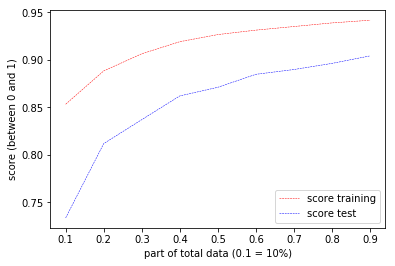

Text(0.5,0,'part of total data (0.1 = 10%)')

Text(0,0.5,'training time (seconds)')

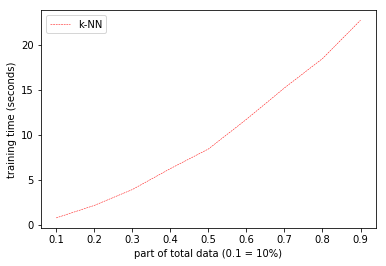

In [0]:
# Make a plot for K-nn with running time and predictive score
plt.plot(size_vec,train_vec, 'r--', label = "score training")
plt.plot(size_vec,test_vec, 'b--', label = "score test")
plt.xlabel('part of total data (0.1 = 10%)')
plt.ylabel('score (between 0 and 1)')
plt.legend()
plt.show()

plt.plot(size_vec, time_vec, 'r--', label = "k-NN")
plt.xlabel('part of total data (0.1 = 10%)')
plt.ylabel('training time (seconds)')
plt.legend()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
# Logistic regression
time_vec = []
train_vec = []
test_vec = []
size_vec = []
for i in range(1,10):
#   Get 10%,20%...90% of the data (stratified)
    size = round(i *0.1,1)
    X_strat, X_test_strat, y_strat, y_test_strat = train_test_split(X, y, train_size=size, stratify = y)
#   Split the stratified data
    X_train, X_test, y_train, y_test = train_test_split(X_strat, y_strat)
    # k-NN on training set
    start_time = time.time()
    lreg = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
    time_vec.append(time.time()-start_time)
    
    train_vec.append(lreg.score(X_train, y_train))
    test_vec.append(lreg.score(X_test, y_test))
    size_vec.append(size)
#   Stops the program after serveral minutes
    if sum(time_vec) > 30*60:
        break

Text(0.5,0,'part of total data (0.1 = 10%)')

Text(0,0.5,'score (between 0 and 1)')

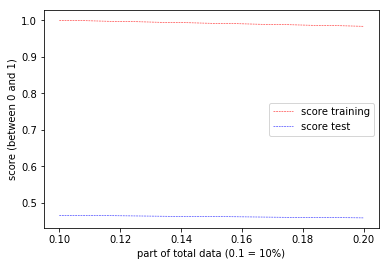

Text(0.5,0,'part of total data (0.1 = 10%)')

Text(0,0.5,'training time (seconds)')

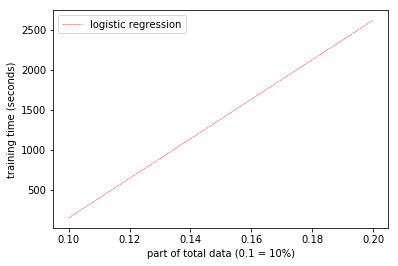

In [0]:
# Make a plot for Logistic Regression with running time and predictive score
plt.plot(size_vec,train_vec, 'r--', label = "score training")
plt.plot(size_vec,test_vec, 'b--', label = "score test")
plt.xlabel('part of total data (0.1 = 10%)')
plt.ylabel('score (between 0 and 1)')
plt.legend()
plt.show()

plt.plot(size_vec, time_vec, 'r--', label = "logistic regression")
plt.xlabel('part of total data (0.1 = 10%)')
plt.ylabel('training time (seconds)')
plt.legend()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
# Logistic regression
time_vec = []
train_vec = []
test_vec = []
size_vec = []
for i in range(1,10):
#   Get 10%,20%...90% of the data (stratified)
    size = round(i *0.1,1)
    X_strat, X_test_strat, y_strat, y_test_strat = train_test_split(X, y, train_size=size, stratify = y)
#   Split the stratified data
    X_train, X_test, y_train, y_test = train_test_split(X_strat, y_strat)
    # k-NN on training set
    start_time = time.time()
    forest = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
    time_vec.append(time.time()-start_time)
    
    train_vec.append(forest.score(X_train, y_train))
    test_vec.append(forest.score(X_test, y_test))
    size_vec.append(size)
#   Stops the program after serveral minutes
    if sum(time_vec) > 30*60:
        break

Text(0.5,0,'part of total data (0.1 = 10%)')

Text(0,0.5,'score (between 0 and 1)')

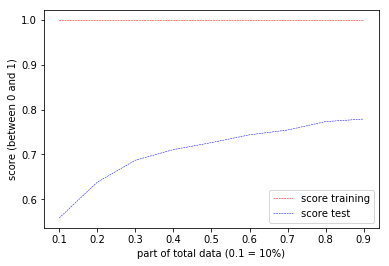

Text(0.5,0,'part of total data (0.1 = 10%)')

Text(0,0.5,'training time (seconds)')

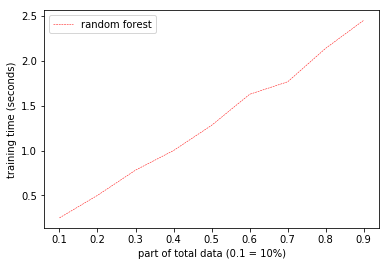

In [0]:
# Make a plot for random forest with running time and predictive score
plt.plot(size_vec,train_vec, 'r--', label = "score training")
plt.plot(size_vec,test_vec, 'b--', label = "score test")
plt.xlabel('part of total data (0.1 = 10%)')
plt.ylabel('score (between 0 and 1)')
plt.legend()
plt.show()

plt.plot(size_vec, time_vec, 'r--', label = "random forest")
plt.xlabel('part of total data (0.1 = 10%)')
plt.ylabel('training time (seconds)')
plt.legend()
plt.show()

2 . Optimize the value for the number of neighbors $k$ (keep $k$ < 50) and the number of trees (keep $n\_estimators$ < 100) on the stratified 10% subsample.
- Use 10-fold crossvalidation and plot $k$ and $n\_estimators$ against the predictive accuracy. Which value of $k$, $n\_estimators$ should you pick?

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
pred_vec = []
for k in range(1,50):
    nbrs = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    scores = cross_val_score(nbrs, X_strat, y_strat, cv=10)
    pred_vec.append(scores.mean())
print(pred_vec.index(max(pred_vec)))

NameError: name 'index' is not defined

Text(0.5,0,'value for k')

Text(0,0.5,'average score (between 0 and 1)')

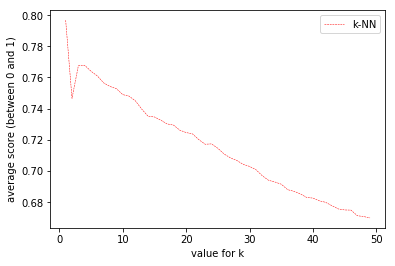

In [0]:
plt.plot(range(1,50),pred_vec, 'r--', label = "k-NN")
plt.xlabel('value for k')
plt.ylabel('average score (between 0 and 1)')
plt.legend()
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
pred_vec = []
for n in range(1,100):
    forest = RandomForestClassifier(n_jobs=-1, n_estimators = n)
    scores = cross_val_score(forest, X_strat, y_strat, cv=10)
    pred_vec.append(scores.mean())
print(pred_vec.index(max(pred_vec)))

97


Text(0.5,0,'value for n_estimators')

Text(0,0.5,'average score (between 0 and 1)')

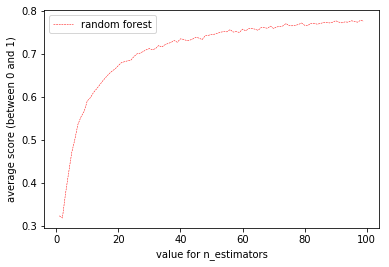

In [0]:
plt.plot(range(1,100),pred_vec, 'r--', label = "random forest")
plt.xlabel('value for n_estimators')
plt.ylabel('average score (between 0 and 1)')
plt.legend()
plt.show()

**Which value of k , n_estimators should you pick?**

For k one would like to pick a small value as the score get lower when k increases. The maximum score is obtained for k = 1.
For n_estimators it is the opposite to k-NN. The score is higher when n_estimators increases, but the curve flattens at the end. By the data above pick n_estimators to be 97.

3 . For the RandomForest, optimize both $n\_estimators$ and $max\_features$ at the same time on the entire dataset.
- Use a nested cross-validation and a random search over the possible values, and measure the accuracy. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal performance you find?
- Hint: choose a nested cross-validation that is feasible. Don't use too many folds in the outer loop.
- Repeat the grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow ACC$ with ACC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import expon

param_grid = {'n_estimators': [10,20,30,40,50], 
              'max_features': [1,2,3,4,5]}
grid_search = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, cv=5)
cross_val = cross_val_score(grid_search, X_strat, y_strat, cv=2)
print("Cross-validation scores: ", cross_val)
print("Mean cross-validation score: ", cross_val.mean())

Cross-validation scores:  [0.636 0.657]
Mean cross-validation score:  0.6467391304347826


ValueError: not enough values to unpack (expected 2, got 1)

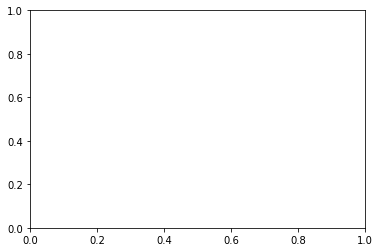

In [0]:
mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'],
                      ylabel='max_features', yticklabels=param_grid['max_features'], cmap="viridis");

## 3. Understanding Ensembles (5 points (3+2))
Do a deeper analysis of how RandomForests and Gradient Boosting reduce their prediction error. We'll use the MAGIC telescope dataset (http://www.openml.org/d/1120). When high-energy particles hit the atmosphere, they produce chain reactions of other particles called 'showers', and you need to detect whether these are caused by gamma rays or cosmic rays.

In [3]:
# Get the data
magic_data = oml.datasets.get_dataset(1120) # Download MAGIC Telescope data
X, y = magic_data.get_data(target=magic_data.default_target_attribute);

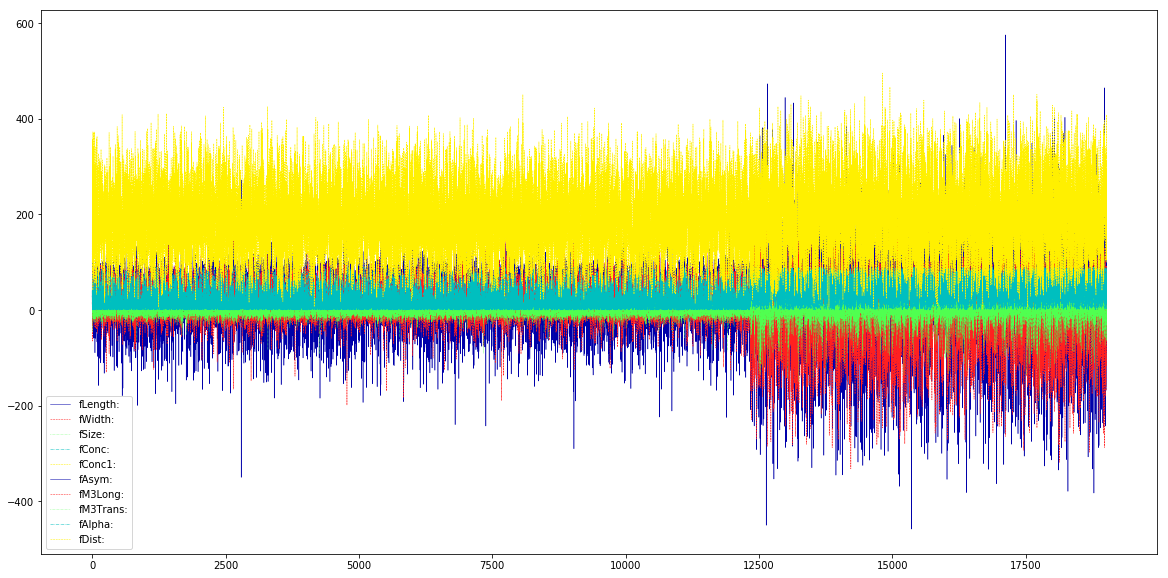

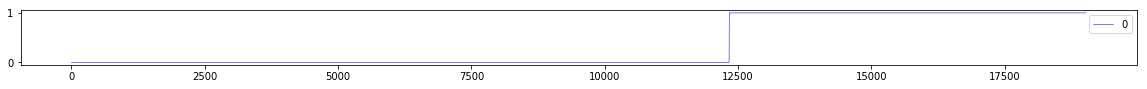

In [4]:
# Quick visualization
X, y, attribute_names = magic_data.get_data(target=magic_data.default_target_attribute, return_attribute_names=True)
magic = pd.DataFrame(X, columns=attribute_names)
magic.plot(figsize=(20,10))
# Also plot the target: 1 = gamma, 0 = background
pd.DataFrame(y).plot(figsize=(20,1));

1 . Do a bias-variance analysis of both algorithms. For each, vary the number of trees on a log scale from 1 to 1024, and plot the bias error (squared), variance, and total error (in one plot per algorithm). Interpret the results. Which error is highest for small ensembles, and which reduced most by each algorithm as you use a larger ensemble? When are both algorithms under- or overfitting? Provide a detailed explanation of why random forests and gradient boosting behave this way.
- See lecture 3 for an example on how to do the bias-variance decomposition
- To save time, you can use a 10% stratified subsample in your initial experiments, but show the plots for the full dataset in your report.

In [6]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split, ShuffleSplit
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
forest_bias_sq = []
forest_var = []
forest_error = []
for n_trees in np.logspace(0,10,num = 11, base =2).astype(np.int64):
    forest = RandomForestClassifier(n_estimators= n_trees, random_state=2, n_jobs=-1)
 
    # Bootstraps
    n_repeat = 100
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        forest.fit(X[train_index], y[train_index])
        y_pred = forest.predict(X[test_index])

        # Store predictions
        for i,index in enumerate(test_index):
            y_all_pred[index].append(y_pred[i])

    # Compute bias, variance, error
    bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
               for i,x in enumerate(y_all_pred)])
    error = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])

    print("Bias squared: %.2f, Variance: %.2f, Total error: %.2f" % (bias_sq, var, error))
    forest_bias_sq.append(bias_sq)
    forest_var.append(var)
    forest_error.append(error)
    

Bias squared: 580.85, Variance: 670.33, Total error: 1251.18
Bias squared: 688.36, Variance: 426.47, Total error: 1114.83
Bias squared: 623.43, Variance: 327.85, Total error: 951.28
Bias squared: 609.92, Variance: 244.57, Total error: 854.49
Bias squared: 622.73, Variance: 186.41, Total error: 809.14
Bias squared: 638.55, Variance: 146.09, Total error: 784.64
Bias squared: 648.17, Variance: 118.77, Total error: 766.94
Bias squared: 657.18, Variance: 102.23, Total error: 759.41


KeyboardInterrupt: 

Text(0.5,0,'n_estimates')

Text(0,0.5,'')

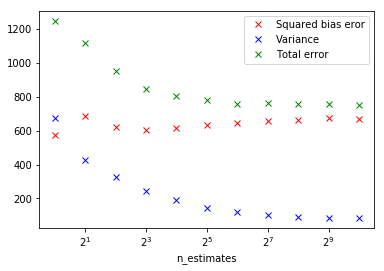

In [20]:
sp = np.logspace(0,10,num = 11, base =2).astype(np.int64)
plt.plot(sp,forest_bias_sq, 'rx', label = "Squared bias eror")
plt.plot(sp,forest_var, 'bx', label = "Variance")
plt.plot(sp,forest_error, 'gx', label = "Total error")
plt.xlabel('n_estimates')
plt.xscale('log',basex=2)
plt.ylabel('')
plt.legend()
plt.show()

In [5]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split, ShuffleSplit
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
gradient_bias_sq = []
gradient_var = []
gradient_error = []
for n_trees in np.logspace(0,10,num = 11, base =2).astype(np.int64):
    grad = GradientBoostingClassifier(n_estimators = n_trees)
 
    # Bootstraps
    n_repeat = 100
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        grad.fit(X[train_index], y[train_index])
        y_pred = grad.predict(X[test_index])

        # Store predictions
        for i,index in enumerate(test_index):
            y_all_pred[index].append(y_pred[i])

    # Compute bias, variance, error
    bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
               for i,x in enumerate(y_all_pred)])
    error = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])

    print("Bias squared: %.2f, Variance: %.2f, Total error: %.2f" % (bias_sq, var, error))
    gradient_bias_sq.append(bias_sq)
    gradient_var.append(var)
    gradient_error.append(error)
    

Bias squared: 2209.14, Variance: 0.00, Total error: 2209.14
Bias squared: 2205.55, Variance: 0.00, Total error: 2205.55
Bias squared: 1343.51, Variance: 61.76, Total error: 1405.27
Bias squared: 1183.33, Variance: 65.04, Total error: 1248.37
Bias squared: 971.40, Variance: 75.51, Total error: 1046.91
Bias squared: 858.73, Variance: 73.85, Total error: 932.58
Bias squared: 770.81, Variance: 71.07, Total error: 841.88
Bias squared: 714.71, Variance: 78.93, Total error: 793.64
Bias squared: 676.86, Variance: 93.82, Total error: 770.68
Bias squared: 641.99, Variance: 110.62, Total error: 752.61
Bias squared: 610.46, Variance: 135.22, Total error: 745.68


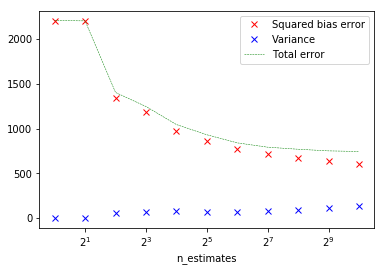

In [7]:
sp = np.logspace(0,10,num = 11, base =2).astype(np.int64)
plt.plot(sp,gradient_bias_sq, 'rx', label = "Squared bias error") # Approximation error
plt.plot(sp,gradient_var, 'bx', label = "Variance") # Estimation error
plt.plot(sp,gradient_error, 'g--', label = "Total error")
plt.xlabel('n_estimates')
plt.xscale('log',basex=2)
plt.ylabel('')
plt.legend()
plt.show()

**Interpret the results. Which error is highest for small ensembles, and which reduced most by each algorithm as you use a larger ensemble?**

For the RandomForest algorithm one can clearly see that the estimation error (variance) is higher for one tree, but the approximation error (bias squared) is higher for more than one tree. The estimation error decreases most once larger ensembles are used.

**When are both algorithms under- or overfitting? Provide a detailed explanation of why random forests and gradient boosting behave this way.**

The algorithm is overfitting when the esamble size is rather small. 
TODO: -onderstaande is copy paste
In a nutshell, increasing the number of individual randomized models in an ensemble will never increase the generalization error.

2 . A _validation curve_ can help you understand when a model starts under- or overfitting. It plots both training and test set error as you change certain characteristics of your model, e.g. one or more hyperparameters. Build validation curves for gradient boosting, evaluated using AUROC, by varying the number of iterations between 1 and 500. In addition, use at least two values for the learning rate (e.g. 0.1 and 1), and tree depth (e.g. 1 and 4). This will yield at least 4 curves. Interpret the results and provide a clear explanation for the results. When is the model over- or underfitting? Discuss the effect of the different combinations learning rate and tree depth and provide a clear explanation.
- While scikit-learn has a `validation_curve` function, we'll use a modified version (below) that provides a lot more detail and can be used to study more than one hyperparameter. You can use a default train-test split.

In [6]:
# Plots validation curves for every classifier in clfs. 
# Also indicates the optimal result by a vertical line
# Uses 1-AUROC, so lower is better
def validation_curve(clfs, X_test, y_test, X_train, y_train):
    for n,clf in enumerate(clfs):
        test_score = np.empty(len(clf.estimators_))
        train_score = np.empty(len(clf.estimators_))

        for i, pred in enumerate(clf.staged_decision_function(X_test)):
            test_score[i] = 1-roc_auc_score(y_test, pred)

        for i, pred in enumerate(clf.staged_decision_function(X_train)):
            train_score[i] = 1-roc_auc_score(y_train, pred)

        best_iter = np.argmin(test_score)
        learn = clf.get_params()['learning_rate']
        depth = clf.get_params()['max_depth']
        test_line = plt.plot(test_score,
                             label='learn=%.1f depth=%i (%.2f)'%(learn,depth,
                                                                 test_score[best_iter]))

        colour = test_line[-1].get_color()
        plt.plot(train_score, '--', color=colour)
        
        plt.xlabel("Number of boosting iterations")
        plt.ylabel("1 - area under ROC")
        plt.axvline(x=best_iter, color=colour)
        
    plt.legend(loc='best')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 

clfs = []

for num_iter in [1, 500]:
    for learn in [0.1, 1]:
        for depth in [1, 4]:
            clf = GradientBoostingClassifier(learning_rate=learn, max_depth=depth, n_estimators=num_iter)
            clfs.append(clf)
            
X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=0)

validation_curve(clfs, X_test, y_test, X_train, y_train)